In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### this is for the clonal mutations only
df = pd.read_csv("/uufs/chpc.utah.edu/common/HIPAA/u1264408/u1264408/Git/SEMIColon/data/output/CellCut/results/vaf_spectra/snvs/output/SBS/snvs.SBS6.all", sep='\t')


In [4]:
# Set mutation types as index
df = df.set_index(df.columns[0])

# Normalize each column by its column sum (proportions)
proportions = df.div(df.sum(axis=0), axis=1)

In [5]:
lee_donors = ["PD", "HLS"]
hiatt_donors = ["AS", "AC", "DC", "DE", "CE", "RE", "TR", "SI", "TC", "RTM", "Laurel"]

# === Function to assign cohort ===
def assign_cohort(sample):
    if any(sample.startswith(prefix) for prefix in lee_donors):
        return "Lee"
    elif any(prefix in sample for prefix in hiatt_donors):
        return "Hiatt"
    else:
        return "Other"


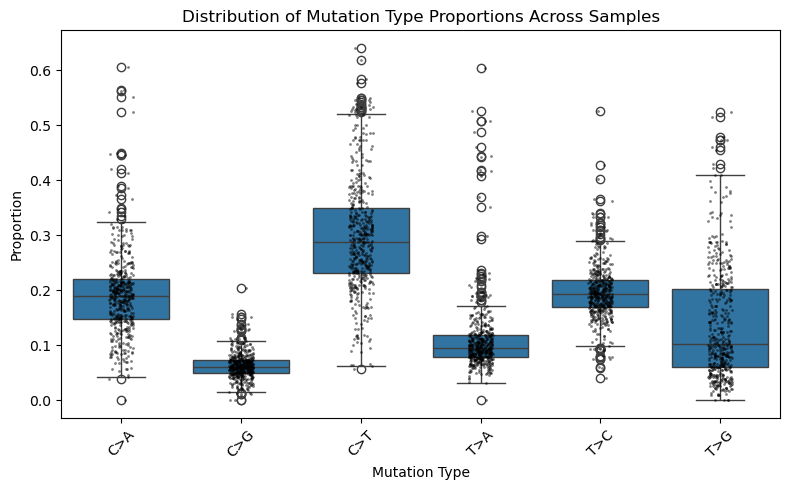

In [6]:
# Convert from wide to long format for plotting
df_long = proportions.reset_index().melt(id_vars=df.index.name,
                                var_name="Sample",
                                value_name="Proportion")

df_long["Cohort"] = df_long["Sample"].apply(assign_cohort)

# Plot: boxplot for range (min–max shown as whiskers)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_long, x=df.index.name, y="Proportion")
sns.stripplot(data=df_long, x=df.index.name, y="Proportion",
              color="black", size=2, jitter=True, alpha=0.5)

plt.title("Distribution of Mutation Type Proportions Across Samples")
plt.ylabel("Proportion")
plt.xlabel("Mutation Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

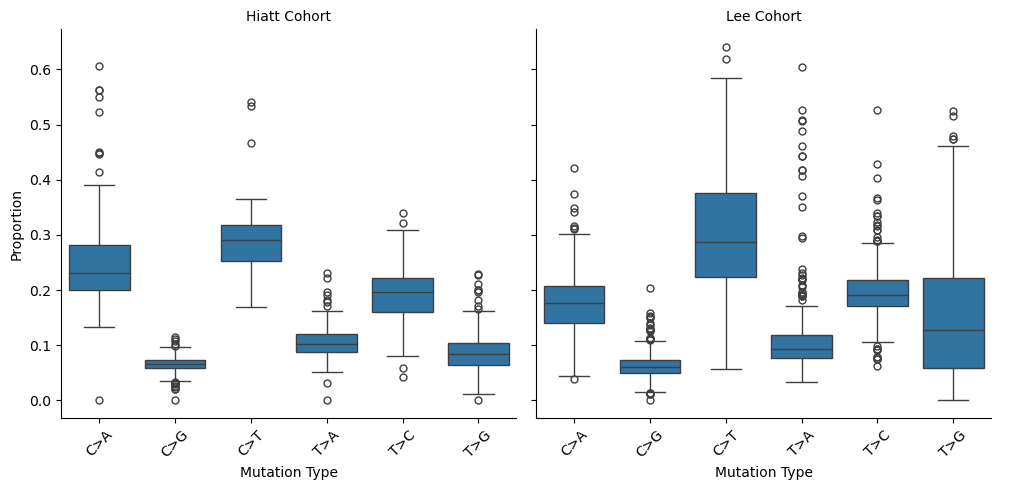

In [7]:
g = sns.catplot(
    data=df_long[df_long["Cohort"].isin(["Lee", "Hiatt"])],
    x=df.index.name,
    y="Proportion",
    col="Cohort",
    kind="box",
    height=5, aspect=1
)

g.set_titles("{col_name} Cohort")
g.set_axis_labels("Mutation Type", "Proportion")
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()